# N06. Presupuesto de compra de energía 2022 - 2028
En este documento se elaborará el presupuesto estimado para la compra de energía del Bloque Carara, durante el periodo comprendido entre diciembre de 2022 y diciembre de 2028.

Se asume que la oferta de ENEL_M2 fue la alternativa seleccionada. El presupuesto se calculará con base en los escenarios de precios previamente proyectados para los 78 meses del análisis.

El presupuesto por compra de energía se refiere a valores económicos y no financieros, lo que significa que no tienen factores de descuento.

Inicialmente se analizarán los egresos por cargos No Regulados. Luego se proyectarán los componentes Regulados y se calcularán los egresos por cargos Regulados. Por último se sumarán los egresos No Regulados más los egresos Regulados. 

## 6.1. Egresos por concepto de los cargos No Regulados por periodos
Se tomarán como base los datos elaborados en la selección de la oferta.

### 6.1.1. Lee los egresos mensuales de cargos No Regulados por escenario
Los valores de egresos mensuales están expresados en miles de millones de pesos. 

In [2]:
#*******************************************************************************       
# 6.1.1. Carga paquetes requeridos para elaborar el presupuesto.
#*******************************************************************************
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import os
%matplotlib inline

In [3]:
#*******************************************************************************       
# 6.1.2. Lee los egresos_ENEL_M2.
#*******************************************************************************
egreso_ENEL_M2 = pd.read_parquet('parquet/egreso_ENEL_M2.parquet.gzip', \
    engine='fastparquet')
egreso_ENEL_m = egreso_ENEL_M2[['egreso_alto', 'egreso_medio', 'egreso_bajo']] 
#Millones de COP. Egresos mensuales de ENEL en 3 escenarios.
egreso_ENEL_m

,egreso_alto,egreso_medio,egreso_bajo
index,,,
2022-12-01,2900.003740,2607.258185,2836.616044
2023-01-01,3502.314690,3167.258121,3447.775364
2023-02-01,3178.069836,3004.411112,3215.713009
2023-03-01,3441.216817,3141.055149,3405.456735
2023-04-01,2873.206981,2624.266485,2756.477377
...,...,...,...
2028-08-01,3841.322106,3231.314081,3591.393861
2028-09-01,4053.062487,3207.105252,3500.907982
2028-10-01,3533.581604,2881.510398,3321.753775


### 6.1.2. Presupuesto mensual de cargos No Regulados por escenario

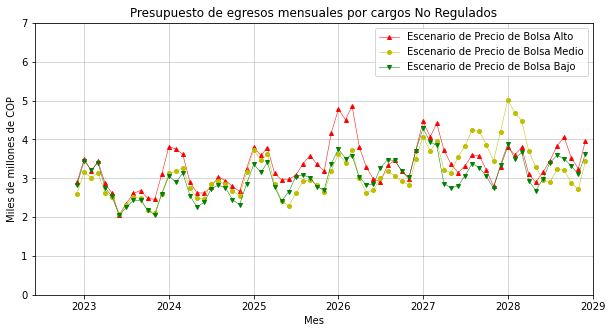

In [4]:
#*******************************************************************************       
# 6.1.3. Grafica egresos mensuales, egreso_ENEL_m.
#*******************************************************************************
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=None)
ax1.set_title ('Presupuesto de egresos mensuales por cargos No Regulados')
ax1.set_ylabel ('Miles de millones de COP')
ax1.set_xlabel ('Mes')
# ax1.plot(pbm_py.index, pbm_py.pbm, 'b-', \
#     label='Precio de Bolsa real', markersize=2)
ax1.plot(egreso_ENEL_m.index, (egreso_ENEL_m.egreso_alto)/1e3, 'r-^', \
    label='Escenario de Precio de Bolsa Alto', linewidth= 0.5, markersize=4)
ax1.plot(egreso_ENEL_m.index, (egreso_ENEL_m.egreso_medio)/1e3, 'y-o', \
    label='Escenario de Precio de Bolsa Medio', linewidth= 0.5, markersize=4)
ax1.plot(egreso_ENEL_m.index, (egreso_ENEL_m.egreso_bajo)/1e3, 'g-v', \
    label='Escenario de Precio de Bolsa Bajo', linewidth= 0.5, markersize=4)
# ax1.axvspan(pd.to_datetime('2022-07-01'), pd.to_datetime('2029-01-01'), \
#      color='#808080', alpha=0.3)
plt.legend(loc='best')
plt.xlim(pd.to_datetime('2022-06-01'), pd.to_datetime('2029-01-01'))
plt.ylim(0, 7)
plt.grid(axis='both', color='k', alpha=0.2)

y_labels = ax1.get_yticks()
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [5]:
#*******************************************************************************       
# 6.1.4. Calcula los egresos anuales, egreso_ENEL_a.
#*******************************************************************************
egreso_ENEL_a = egreso_ENEL_m.groupby(egreso_ENEL_m.index.to_period('Y')).sum()

### 6.1.3. Presupuesto anual de cargos No Regulados por escenario

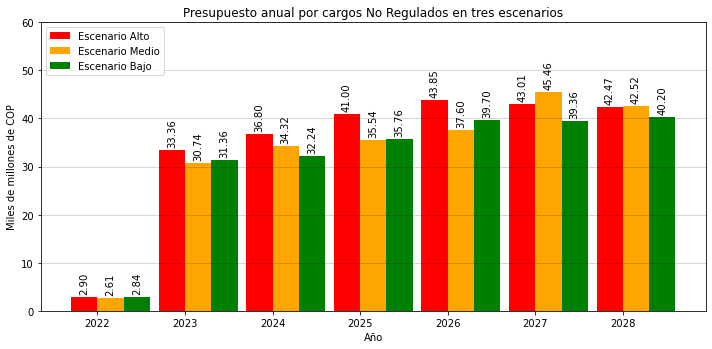

In [7]:
#*******************************************************************************
# 6.1.5. Grafica el egreso anual por cargos No Regulados en tres escenarios.
#*******************************************************************************
fig, ax = plt.subplots(figsize=(10,5))

anios = egreso_ENEL_a.index
escenario_alto = ((egreso_ENEL_a.egreso_alto)/1e3).round(2)
escenario_medio = ((egreso_ENEL_a.egreso_medio)/1e3).round(2)
escenario_bajo = ((egreso_ENEL_a.egreso_bajo)/1e3).round(2)


x = np.arange(len(escenario_alto))  # La localización de etiquetas.
width = 0.30  # El ancho de las barras.

rects1 = ax.bar(x - width/2, escenario_alto, width, label='Escenario Alto', \
    color='r')
rects2 = ax.bar(x + width/2, escenario_medio, width, label='Escenario Medio', \
    color='orange')
rects3 = ax.bar(x + 3 * width/2, escenario_bajo, width, label='Escenario Bajo', \
    color='g')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Presupuesto anual por cargos No Regulados en tres escenarios')
ax.set_xlabel('Año')
ax.set_ylabel('Miles de millones de COP')
ax.set_xticks(x, anios)
ax.legend(loc=2)

ax.bar_label(rects1, padding=3, fmt='%0.2f', rotation=90)
ax.bar_label(rects2, padding=3, fmt='%0.2f', rotation=90)
ax.bar_label(rects3, padding=3, fmt='%0.2f', rotation=90)

fig.tight_layout()

plt.ylim(0, 60)
plt.grid(axis='y', color='k', alpha=0.2)
plt.show()

### 6.1.4. Presupuesto anual de cargos No Regulados con promedio de escenarios

In [21]:
#*******************************************************************************
# 6.1.6. Calcula el egreso promedio de los escenarios de cargos regulados.
#*******************************************************************************
egreso_ENEL_a_promedio = egreso_ENEL_a.mean(axis=1)

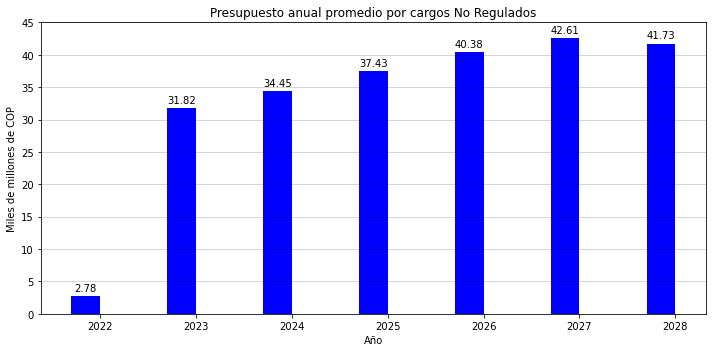

In [25]:
#*******************************************************************************
# 6.1.7. Grafica el egreso anual promedio por cargos No Regulados.
#*******************************************************************************
fig, ax = plt.subplots(figsize=(10,5))

anios = egreso_ENEL_a_promedio.index
egreso_anual_promedio = ((egreso_ENEL_a_promedio)/1e3).round(2)


x = np.arange(len(egreso_anual_promedio))  # La localización de etiquetas.
width = 0.30  # El ancho de las barras.

rects1 = ax.bar(x - width/2, egreso_anual_promedio, width, 
                label='Egreso anual promedio', 
                color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Presupuesto anual promedio por cargos No Regulados')
ax.set_xlabel('Año')
ax.set_ylabel('Miles de millones de COP')
ax.set_xticks(x, anios)
# ax.legend(loc=2)

ax.bar_label(rects1, padding=3, fmt='%0.2f', rotation=0)

fig.tight_layout()

plt.ylim(0, 45)
plt.grid(axis='y', color='k', alpha=0.2)
plt.show()

## 6.2. Egresos por concepto de los cargos Regulados por periodos
Se tomarán como base histórica para la proyección, los cargos regulados que aparecen facturados en las liquidaciones por ECOPETROL Energía.

### 6.2.1. Lee los cargos Regulados históricos
Los valores de los cargos se extraen de la hoja 'Liquidación' de los libros Excel 'Bitacora_Factura_Frontera_Frt11545 enero 2022.xlsx', los cuales son suministrados por ECOPETROL Energía a CEPSA, para los meses de octubre de 2021 a abril de 2022. 

In [26]:
#*******************************************************************************
# 6.2.1. Lee lista de todos los libros Excel disponibles de 'Bitacora_Factura'.
#*******************************************************************************
lista_bitacoras = os.listdir('bitacoras_consumos')
df_bitacoras = pd.DataFrame({'nombre_archivo': lista_bitacoras, 
    'mes': np.NaN, 'stn': np.NaN, 'str': np.NaN, 'restricciones': np.NaN, 
    'ocv': np.NaN, 'perdidas': np.NaN}, index=range(0, len(lista_bitacoras)))
df_bitacoras.sort_index(axis=0, inplace=True)
df_bitacoras.loc[:, 'mes'] = pd.to_datetime(
    df_bitacoras.nombre_archivo.str.slice(-11, -7) + '-' + 
    df_bitacoras.nombre_archivo.str.slice(-7, -5) + '-01')


In [27]:
#*******************************************************************************
# 6.2.2. Lee los valores de los cargos regulados.
#*******************************************************************************
for i, nombre in enumerate(df_bitacoras.nombre_archivo, start=0): 
    if nombre[-11 : -7] == '2019':
        libro = pd.read_excel('bitacoras_consumos/' + nombre, 
        sheet_name='Liquidación', skiprows=94, usecols="B:Z")
        df_bitacoras.loc[i, 'stn'] = libro.iloc[2, 1:25].mean()
        df_bitacoras.loc[i, 'str'] = libro.iloc[43, 1]
        df_bitacoras.loc[i, 'restricciones'] = libro.iloc[84, 1] - 1
        df_bitacoras.loc[i, 'ocv'] = 1
        df_bitacoras.loc[i, 'perdidas'] = libro.iloc[125, 1] + \
            libro.iloc[166, 1:25].mean()
    elif nombre[-11 : -7] == '2020':
        libro = pd.read_excel('bitacoras_consumos/' + nombre, 
        sheet_name='Liquidación', skiprows=90, usecols="B:Z")
        df_bitacoras.loc[i, 'stn'] = libro.iloc[2, 1:25].mean()
        df_bitacoras.loc[i, 'str'] = libro.iloc[43, 1]
        df_bitacoras.loc[i, 'restricciones'] = libro.iloc[84, 1] - 1.0
        df_bitacoras.loc[i, 'ocv'] = 1.0
        df_bitacoras.loc[i, 'perdidas'] = libro.iloc[125, 1] + \
            libro.iloc[166, 1:25].mean()
    else:
        libro = pd.read_excel('bitacoras_consumos/' + nombre, 
        sheet_name='Liquidación', skiprows=90, usecols="B:Z")
        df_bitacoras.loc[i, 'stn'] = libro.iloc[2, 1:25].mean()
        df_bitacoras.loc[i, 'str'] = libro.iloc[43, 1]
        df_bitacoras.loc[i, 'restricciones'] = libro.iloc[84, 1]
        df_bitacoras.loc[i, 'ocv'] = libro.iloc[127, 1]
        df_bitacoras.loc[i, 'perdidas'] = libro.iloc[170, 1:25].mean()
# df_bitacoras    


In [28]:
#*******************************************************************************       
# 6.2.3. Salva y lee df_bitacoras.
#*******************************************************************************
# # # #Salva df_bitacoras
df_bitacoras.to_parquet\
    ('parquet/df_bitacoras.parquet.gzip', \
        compression='gzip', engine='fastparquet')
df_bitacoras.to_excel('xlsx/df_bitacoras.xlsx', sheet_name='hoja_1')
#Lee df_bitacoras
df_bitacoras = pd.read_parquet\
    ('parquet/df_bitacoras.parquet.gzip', engine='fastparquet')

### 6.2.2. Proyecta los cargos regulados

In [29]:
#*******************************************************************************       
# 6.2.4. Crea la estructura de cargos_regu para la proyección.
#*******************************************************************************
cargos_regu = df_bitacoras.copy()
cargos_regu.drop(columns='nombre_archivo', axis=1, inplace=True)
cargos_regu.set_index('mes', inplace=True)
# Agrega mayo y junio de PDF.
# ('2022-05-01'). Transmisión: 43.96; Distribución: 35.34; Restricciones 47.58; 
# Otros Cargos: 1.16; Pérdidas: 23.26.
# ('2022-06-01'). Transmisión: 41.46; Distribución: 33.64; Restricciones 46.75; 
# Otros Cargos 1.21; Pérdidas:23.56.
cargos_regu.loc[pd.to_datetime('2022-05-01')] = [43.96, 35.34, 47.58, 1.16, 23.26]
cargos_regu.loc[pd.to_datetime('2022-06-01')] = [41.46, 33.64, 46.75, 1.21, 23.56]
cargos_regu.loc[pd.to_datetime('2021-09-01')] = [39.80, 26.55, 28.43, 1.01, 5.90]
cargos_regu = cargos_regu.sort_index()
# Agrega n_mes
cargos_regu.insert(loc=len(cargos_regu.columns), column='n_mes', 
    value=range(0, len(cargos_regu)))
# Agrega los meses a proyectar y las columnas de cargos proyectadas, '_hat'.
inicio_proyeccion = '2022-08-01'
fin_proyeccion = '2028-12-01'
longitud_proyeccion = len(pd.date_range(start=inicio_proyeccion, 
    end=fin_proyeccion, freq='MS'))
meses_py = pd.DataFrame({'stn': np.NaN,	'str':np.NaN, 'restricciones':np.NaN,	
    'ocv':np.NaN, 'perdidas':np.NaN, 'n_mes':range(len(cargos_regu), 
    len(cargos_regu) + longitud_proyeccion), 'stn_hat': np.NaN, 
    'str_hat':np.NaN, 'restricciones_hat':np.NaN,	
    'ocv_hat':np.NaN, 'perdidas_hat':np.NaN,}, 
    index=pd.date_range(start=inicio_proyeccion, end=fin_proyeccion, freq='MS'))
cargos_regu = pd.concat([cargos_regu, meses_py])

In [30]:
#*******************************************************************************       
# 6.2.5. Elabora la proyección de los cargos_regu.
#*******************************************************************************
inicio_ajuste = '2019-12-01'
final_ajuste = '2021-12-01'
inicio_proyeccion = '2019-12-01'
final_proyeccion = '2028-12-01'

#STN
m, b = np.polyfit(cargos_regu.loc[inicio_ajuste:final_ajuste, 'n_mes'], 
cargos_regu.loc[inicio_ajuste:final_ajuste, 'stn'], 1)
cargos_regu.loc[inicio_proyeccion:final_proyeccion, 'stn_hat'] = \
    m * cargos_regu.loc[inicio_proyeccion:final_proyeccion, 'n_mes'] + b
# #STR
inicio_ajuste = '2020-06-01'
final_ajuste = '2022-03-01'
inicio_proyeccion = '2020-06-01'
final_proyeccion = '2028-12-01'

m, b = np.polyfit(cargos_regu.loc[inicio_ajuste:final_ajuste, 'n_mes'], 
cargos_regu.loc[inicio_ajuste:final_ajuste, 'str'], 1)
cargos_regu.loc[inicio_proyeccion:final_proyeccion, 'str_hat'] = \
    m * cargos_regu.loc[
    inicio_proyeccion:final_proyeccion, 'n_mes'] + b
#Restricciones
inicio_ajuste = '2020-09-01'
final_ajuste = '2022-03-01'
inicio_proyeccion = '2020-09-01'
final_proyeccion = '2028-12-01'

m, b = np.polyfit(cargos_regu.loc[inicio_ajuste:final_ajuste, 'n_mes'], 
cargos_regu.loc[inicio_ajuste:final_ajuste, 'restricciones'], 1)
cargos_regu.loc[inicio_proyeccion:final_proyeccion, 'restricciones_hat'] = \
    m * cargos_regu.loc[inicio_proyeccion:final_proyeccion, 'n_mes'] + b
#Ocv
inicio_ajuste = '2021-01-01'
final_ajuste = '2022-07-01'
inicio_proyeccion = '2021-01-01'
final_proyeccion = '2028-12-01'

m, b = np.polyfit(cargos_regu.loc[inicio_ajuste:final_ajuste, 'n_mes'], 
cargos_regu.loc[inicio_ajuste:final_ajuste, 'ocv'], 1)
cargos_regu.loc[inicio_proyeccion:final_proyeccion, 'ocv_hat'] = \
    m * cargos_regu.loc[inicio_proyeccion:final_proyeccion, 'n_mes'] + b
#Pérdidas
inicio_ajuste = '2022-03-01'
final_ajuste = '2022-07-01'
inicio_proyeccion = '2022-03-01'
final_proyeccion = '2028-12-01'

m, b = np.polyfit(cargos_regu.loc[inicio_ajuste:final_ajuste, 'n_mes'], 
cargos_regu.loc[inicio_ajuste:final_ajuste, 'perdidas'], 1)
cargos_regu.loc[inicio_proyeccion:final_proyeccion, 'perdidas_hat'] = \
    m * cargos_regu.loc[inicio_proyeccion:final_proyeccion, 'n_mes'] + b



In [31]:
#*******************************************************************************       
# 6.2.6. Salva y lee cargos_regu.
#*******************************************************************************
# Salva cargos_regu
cargos_regu.to_parquet\
    ('parquet/cargos_regu.parquet.gzip', \
        compression='gzip', engine='fastparquet')
cargos_regu.to_excel('xlsx/cargos_regu.xlsx', sheet_name='hoja_1')
#Lee cargos_regu
cargos_regu = pd.read_parquet\
    ('parquet/cargos_regu.parquet.gzip', engine='fastparquet')

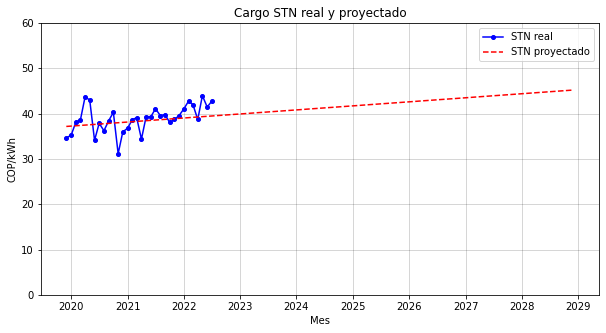

In [32]:
#*******************************************************************************
# 6.2.7. Grafica STN real y proyectado.
#*******************************************************************************
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=None)
ax1.set_title ('Cargo STN real y proyectado')
ax1.set_ylabel ('COP/kWh')
ax1.set_xlabel ('Mes')
ax1.plot(cargos_regu.index, cargos_regu.stn, 'b-o', \
    label='STN real', markersize=4)
ax1.plot(cargos_regu.index, cargos_regu.stn_hat, 'r--', \
    label='STN proyectado', markersize=2)
plt.legend(loc='best')
# plt.xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2029-01-01'))
plt.ylim(0, 60)
plt.grid(axis='both', color='k', alpha=0.2)
plt.show()

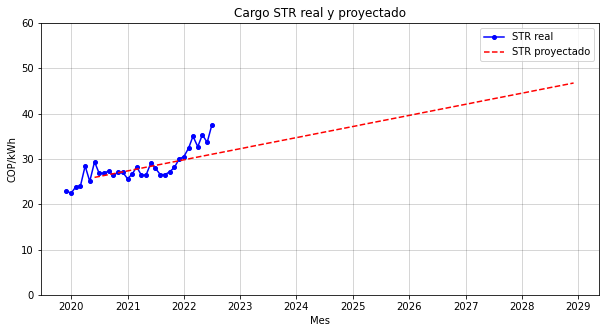

In [33]:
#*******************************************************************************
# 6.2.8. Grafica STR real y proyectado.
#*******************************************************************************
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=None)
ax1.set_title ('Cargo STR real y proyectado')
ax1.set_ylabel ('COP/kWh')
ax1.set_xlabel ('Mes')
ax1.plot(cargos_regu.index, cargos_regu.str, 'b-o', \
    label='STR real', markersize=4)
ax1.plot(cargos_regu.index, cargos_regu.str_hat, 'r--', \
    label='STR proyectado', markersize=2)
plt.legend(loc='best')
# plt.xlim(pd.to_datetime('2020-06-01'), pd.to_datetime('2023-01-01'))
plt.ylim(0, 60)
plt.grid(axis='both', color='k', alpha=0.2)
plt.show()

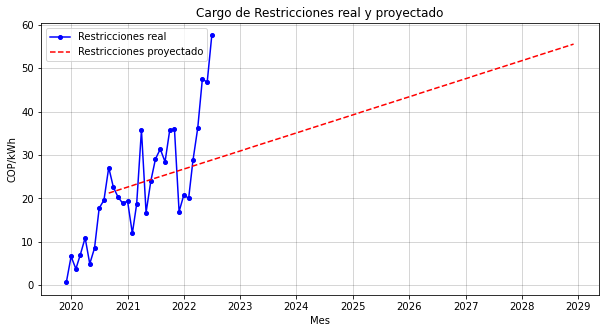

In [34]:
#*******************************************************************************
# 6.2.9. Grafica del cargo de Restricciones real y proyectado.
#*******************************************************************************
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=None)
ax1.set_title ('Cargo de Restricciones real y proyectado')
ax1.set_ylabel ('COP/kWh')
ax1.set_xlabel ('Mes')
ax1.plot(cargos_regu.index, cargos_regu.restricciones, 'b-o', \
    label='Restricciones real', markersize=4)
ax1.plot(cargos_regu.index, cargos_regu.restricciones_hat, 'r--', \
    label='Restricciones proyectado', markersize=2)
plt.legend(loc='best')
# plt.xlim(pd.to_datetime('2020-06-01'), pd.to_datetime('2023-01-01'))
# plt.ylim(0, 200)
plt.grid(axis='both', color='k', alpha=0.2)
plt.show()

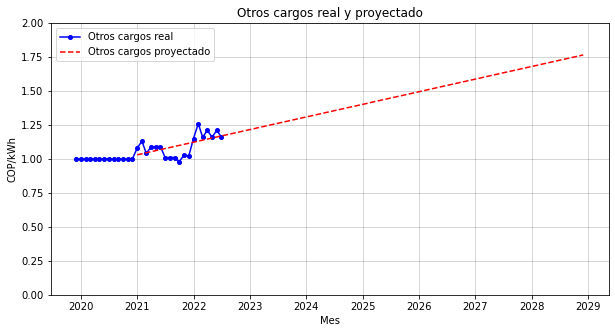

In [35]:
#*******************************************************************************
# 6.2.10. Grafica de Otros cargos, real y proyectado.
#*******************************************************************************
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=None)
ax1.set_title ('Otros cargos real y proyectado')
ax1.set_ylabel ('COP/kWh')
ax1.set_xlabel ('Mes')
ax1.plot(cargos_regu.index, cargos_regu.ocv, 'b-o', \
    label='Otros cargos real', markersize=4)
ax1.plot(cargos_regu.index, cargos_regu.ocv_hat, 'r--', \
    label='Otros cargos proyectado', markersize=2)
plt.legend(loc='best')
# plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2024-01-01'))
plt.ylim(0, 2)
plt.grid(axis='both', color='k', alpha=0.2)
plt.show()

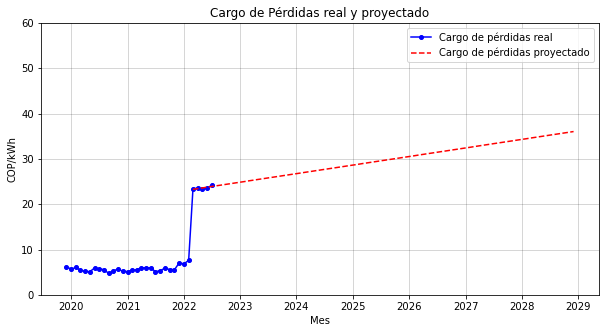

In [36]:
#*******************************************************************************
# 6.2.11. Grafica del cargo de Pérdidas, real y proyectado.
#*******************************************************************************
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=None)
ax1.set_title ('Cargo de Pérdidas real y proyectado')
ax1.set_ylabel ('COP/kWh')
ax1.set_xlabel ('Mes')
ax1.plot(cargos_regu.index, cargos_regu.perdidas, 'b-o', \
    label='Cargo de pérdidas real', markersize=4)
ax1.plot(cargos_regu.index, cargos_regu.perdidas_hat, 'r--', \
    label='Cargo de pérdidas proyectado', markersize=2)
plt.legend(loc='best')
# plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2023-01-01'))
plt.ylim(0, 60)
plt.grid(axis='both', color='k', alpha=0.2)
plt.show()

### 6.2.3. Proyecta los egresos de cargos regulados mensuales

In [49]:
#*******************************************************************************
# 6.2.12. Crea proyección de egresos por cargos regulados mensuales.
#*******************************************************************************
#Lee demanda
demanda = pd.read_parquet('parquet/demanda.parquet.gzip', \
    engine='fastparquet')
cargos_regu = pd.read_parquet\
    ('parquet/cargos_regu.parquet.gzip', engine='fastparquet')
egresos_regu_py = cargos_regu.loc['2022-12-01':, ['stn_hat', 'str_hat', 
    'restricciones_hat', 'ocv_hat', 'perdidas_hat']]
#Suma de cargos regulados.
egresos_regu_py.insert(loc=len(egresos_regu_py.columns), 
  column='cargos_regu', value=egresos_regu_py.sum(axis=1))
#Demanda del Bloque.
egresos_regu_py = pd.concat([egresos_regu_py, demanda], axis=1)
#Egresos de stn.
egresos_regu_py.insert(loc=len(egresos_regu_py.columns), 
    column='egresos_stn', value=egresos_regu_py.stn_hat * 
    egresos_regu_py.demanda)  
#Egresos de str.
egresos_regu_py.insert(loc=len(egresos_regu_py.columns), 
    column='egresos_str', value=egresos_regu_py.str_hat * 
    egresos_regu_py.demanda)  
#Egresos de restricciones.
egresos_regu_py.insert(loc=len(egresos_regu_py.columns), 
    column='egresos_restricciones', value=egresos_regu_py.restricciones_hat * 
    egresos_regu_py.demanda)  
#Egresos de ocv.
egresos_regu_py.insert(loc=len(egresos_regu_py.columns), 
    column='egresos_ocv', value=egresos_regu_py.ocv_hat * 
    egresos_regu_py.demanda)  
#Egresos de perdidas.
egresos_regu_py.insert(loc=len(egresos_regu_py.columns), 
    column='egresos_perdidas', value=egresos_regu_py.perdidas_hat * 
    egresos_regu_py.demanda)  
#Egresos de cargos regulados.
egresos_regu_py.insert(loc=len(egresos_regu_py.columns), 
    column='egresos_regu', value=egresos_regu_py.cargos_regu * 
        egresos_regu_py.demanda)  

In [51]:
#*******************************************************************************       
# 6.2.13. Salva y lee egresos_regu_py.
#*******************************************************************************
# Salva egresos_regu_py
egresos_regu_py.to_parquet\
    ('parquet/egresos_regu_py.parquet.gzip', \
        compression='gzip', engine='fastparquet')
egresos_regu_py.to_excel('xlsx/egresos_regu_py.xlsx', sheet_name='hoja_1')
#Lee egresos_regu_py
egresos_regu_py = pd.read_parquet\
    ('parquet/egresos_regu_py.parquet.gzip', engine='fastparquet')

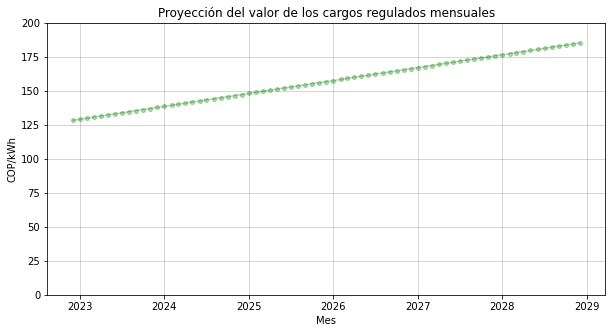

In [52]:
#*******************************************************************************
# 6.2.14. Grafica la proyección del valor de cargo regulado.
#*******************************************************************************
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=None)
ax1.set_title ('Proyección del valor de los cargos regulados mensuales')
ax1.set_ylabel ('COP/kWh')
ax1.set_xlabel ('Mes')
ax1.plot(egresos_regu_py.index, egresos_regu_py.cargos_regu, 'g-o', \
    label='Valor de cargos regulado', markersize=4, alpha=0.3)
# plt.legend(loc='best')
# plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2023-01-01'))
plt.ylim(0, 200)
plt.grid(axis='both', color='k', alpha=0.2)
plt.show()

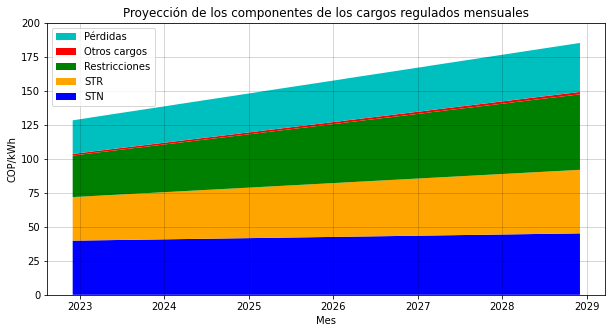

In [53]:
#*******************************************************************************
# 6.2.15. Grafica la proyección de los componentes de cargos regulados.
#*******************************************************************************
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=None)
ax1.set_title ('Proyección de los componentes de los cargos regulados mensuales')
ax1.set_ylabel ('COP/kWh')
ax1.set_xlabel ('Mes')
ax1.stackplot(egresos_regu_py.index, egresos_regu_py.stn_hat, 
    egresos_regu_py.str_hat, egresos_regu_py.restricciones_hat, 
    egresos_regu_py.ocv_hat, egresos_regu_py.perdidas_hat, 
    labels=('STN', 'STR', 'Restricciones', 'Otros cargos', 'Pérdidas'), 
    colors=['b', 'orange', 'g', 'r', 'c'])
#Cambia el orden de los elementos de la leyenda
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [4, 3, 2, 1, 0]
#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
    loc=2)
#
# plt.legend()
# plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2023-01-01'))
plt.ylim(0, 200)
plt.grid(axis='both', color='k', alpha=0.2)
plt.show()

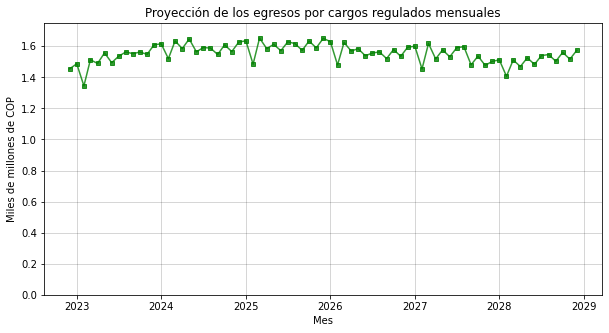

In [56]:
#*******************************************************************************
# 6.2.16. Grafica la proyección del valor de egresos por cargos regulados.
#*******************************************************************************
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 1, 1)  # Crea una figura conteniendo un solo eje.
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=None)
ax1.set_title ('Proyección de los egresos por cargos regulados mensuales')
ax1.set_ylabel ('Miles de millones de COP')
ax1.set_xlabel ('Mes')
ax1.plot(egresos_regu_py.index, egresos_regu_py.egresos_regu/1e3, 'g-s', \
    label='Valor de cargos regulado', markersize=4, alpha=0.8)
# plt.legend(loc='best')
# plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2023-01-01'))
plt.ylim(0, 1.75)
plt.grid(axis='both', color='k', alpha=0.2)
plt.show()

### 6.2.4. Proyecta los egresos de los cargos regulados anuales

In [57]:
#*******************************************************************************       
# 6.2.17. Calcula los egresos regulados anuales.
#*******************************************************************************
egresos_regu_py_a = egresos_regu_py.iloc[:, 7:].groupby(
    egresos_regu_py.index.to_period('Y')).sum()
egresos_regu_py_a.index = pd.to_datetime(egresos_regu_py_a.index.astype(str))  

In [58]:
#*******************************************************************************       
# 6.2.18. Salva y lee egresos_regu_py_a.
#*******************************************************************************
# Salva egresos_regu_py_a
egresos_regu_py_a.to_parquet\
    ('parquet/egresos_regu_py_a.parquet.gzip', \
        compression='gzip', engine='fastparquet')
egresos_regu_py_a.to_excel('xlsx/egresos_regu_py_a.xlsx', sheet_name='hoja_1')
#Lee egresos_regu_py_a
egresos_regu_py_a = pd.read_parquet\
    ('parquet/egresos_regu_py_a.parquet.gzip', engine='fastparquet')

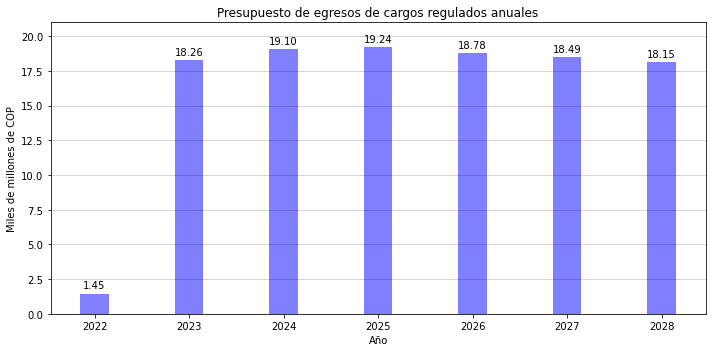

In [62]:
#*******************************************************************************
# 6.1.19. Grafica la proyección de egresos de cargos Regulados anuales.
#*******************************************************************************
fig, ax = plt.subplots(figsize=(10,5))

anios = egresos_regu_py_a.index.to_period('Y')
egresos_regu_anual = ((egresos_regu_py_a.egresos_regu)/1e3).round(2)


x = np.arange(len(egresos_regu_anual))  # La localización de etiquetas.
width = 0.30  # El ancho de las barras.

rects1 = ax.bar(x, egresos_regu_anual, width, 
label='Egresos regulados anuales', color='b', alpha=0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Presupuesto de egresos de cargos regulados anuales')
ax.set_xlabel('Año')
ax.set_ylabel('Miles de millones de COP')
ax.set_xticks(x, anios)
# ax.legend(loc=2)

ax.bar_label(rects1, padding=3, fmt='%0.2f', rotation=0)

fig.tight_layout()

plt.ylim(0, 21)
plt.grid(axis='y', color='k', alpha=0.2)
plt.show()

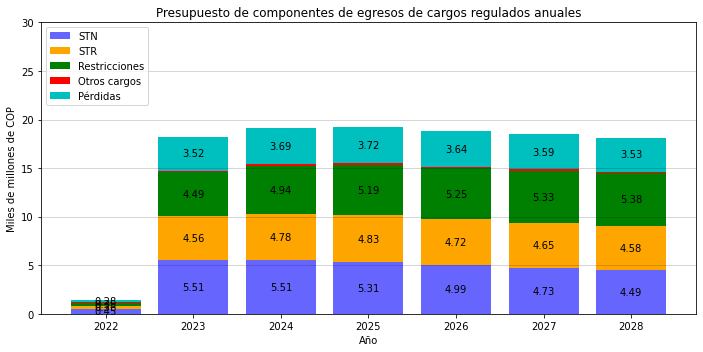

In [63]:
#*******************************************************************************
# 6.1.20. Grafica los componentes de los egresos de cargos Regulados anuales.
#*******************************************************************************
fig, ax = plt.subplots(figsize=(10,5))

# egresos_regu_anual = ((egresos_regu_py_a.egresos_regu)/1e3).round(2)

# Crea los datos de las series.
x = ['2022', '2023', '2024', '2025', '2026', '2027', '2028']
y1 = ((egresos_regu_py_a.egresos_stn)/1e3).round(2)
y2 = ((egresos_regu_py_a.egresos_str)/1e3).round(2)
y3 = ((egresos_regu_py_a.egresos_restricciones)/1e3).round(2)
y4 = ((egresos_regu_py_a.egresos_ocv)/1e3).round(2)
y5 = ((egresos_regu_py_a.egresos_perdidas)/1e3).round(2)
  
# Dibuja las barras de manera apilada.
rectangulo1 = plt.bar(x, y1, color='b', alpha=0.6)
rectangulo2 = plt.bar(x, y2, bottom=y1, color='orange')
rectangulo3 = plt.bar(x, y3, bottom=y1+y2, color='g')
rectangulo4 = plt.bar(x, y4, bottom=y1+y2+y3, color='r')
rectangulo5 = plt.bar(x, y5, bottom=y1+y2+y3+y4, color='c')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Presupuesto de componentes de egresos de cargos regulados anuales')
ax.set_xlabel('Año')
ax.set_ylabel('Miles de millones de COP')
# ax.set_xticks(x, anios)
# ax.legend(loc=2)
plt.legend(["STN", "STR", "Restricciones", "Otros cargos", "Pérdidas"], loc=2)

ax.bar_label(rectangulo1, label_type='center', fmt='%0.2f', rotation=0)
ax.bar_label(rectangulo2, label_type='center', fmt='%0.2f', rotation=0)
ax.bar_label(rectangulo3, label_type='center', fmt='%0.2f', rotation=0)
ax.bar_label(rectangulo5, label_type='center', fmt='%0.2f', rotation=0)

fig.tight_layout()

plt.ylim(0, 30)
plt.grid(axis='y', color='k', alpha=0.2)
plt.show()

## 6.3. Proyección de egresos de la tarifa total con cargos No Regulados más Regulados


In [64]:
#*******************************************************************************       
# 6.2.21. Lee egresos_regu_py y egreso_ENEL_M2.
#*******************************************************************************
#Lee egresos_regu_py
egresos_regu_py = pd.read_parquet\
    ('parquet/egresos_regu_py.parquet.gzip', engine='fastparquet')
#Lee egreso_ENEL_M2
egreso_ENEL_M2 = pd.read_parquet\
    ('parquet/egreso_ENEL_M2.parquet.gzip', engine='fastparquet')

In [67]:
#*******************************************************************************       
# 6.2.22. Calcula los egresos totales mensuales.
#*******************************************************************************
egreso_total_m = pd.concat([egreso_ENEL_M2.loc[:, 
    ['egreso_alto', 'egreso_medio', 'egreso_bajo']], 
    egresos_regu_py.loc[:, ['egresos_regu']]], axis=1)
egreso_total_m.insert(loc=len(egreso_total_m.columns), 
    column='egreso_total_alto', 
    value=egreso_total_m.egreso_alto + egreso_total_m.egresos_regu)
egreso_total_m.insert(loc=len(egreso_total_m.columns), 
    column='egreso_total_medio', 
    value=egreso_total_m.egreso_medio + egreso_total_m.egresos_regu)
egreso_total_m.insert(loc=len(egreso_total_m.columns), 
    column='egreso_total_bajo', 
    value=egreso_total_m.egreso_bajo + egreso_total_m.egresos_regu)
egreso_total_m.insert(loc=len(egreso_total_m.columns), 
    column='egreso_total_promedio', 
    value=egreso_total_m.loc[:, ['egreso_total_alto', 'egreso_total_medio', 
        'egreso_total_bajo']].mean(axis=1))

In [68]:
#*******************************************************************************       
# 6.2.23. Calcula el egreso total anual.
#*******************************************************************************
egreso_total_a = egreso_total_m.groupby(
    egreso_total_m.index.to_period('Y')).sum()
egreso_total_a.index = pd.to_datetime(egreso_total_a.index.astype(str))    

In [69]:
#*******************************************************************************       
# 6.2.24. Salva y lee egreso_total_m y egreso_total_a.
#*******************************************************************************
# Salva egresos_total_m
egreso_total_m.to_parquet\
    ('parquet/egreso_total_m.parquet.gzip', \
        compression='gzip', engine='fastparquet')
egreso_total_m.to_excel('xlsx/egreso_total_m.xlsx', sheet_name='hoja_1')
# Salva egresos_total_a
egreso_total_a.to_parquet\
    ('parquet/egreso_total_a.parquet.gzip', \
        compression='gzip', engine='fastparquet')
egreso_total_a.to_excel('xlsx/egreso_total_a.xlsx', sheet_name='hoja_1')
##
#Lee egreso_total_m
egreso_total_m = pd.read_parquet\
    ('parquet/egreso_total_m.parquet.gzip', engine='fastparquet')
#Lee egreso_total_a
egreso_total_a = pd.read_parquet\
    ('parquet/egreso_total_a.parquet.gzip', engine='fastparquet')

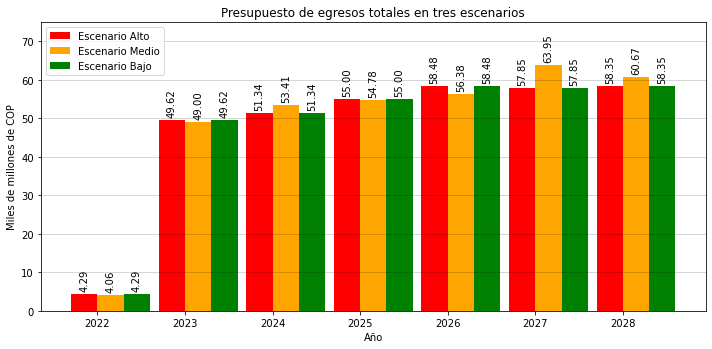

In [72]:
#*******************************************************************************
# 6.1.25. Grafica el egreso total anual en tres escenarios.
#*******************************************************************************
fig, ax = plt.subplots(figsize=(10,5))

anios = egreso_total_a.index.to_period('Y')
escenario_alto = ((egreso_total_a.egreso_total_bajo)/1e3).round(2)
escenario_medio = ((egreso_total_a.egreso_total_medio)/1e3).round(2)
escenario_bajo = ((egreso_total_a.egreso_total_bajo)/1e3).round(2)


x = np.arange(len(escenario_alto))  # La localización de etiquetas.
width = 0.30  # El ancho de las barras.

rects1 = ax.bar(x - width/2, escenario_alto, width, label='Escenario Alto', \
    color='r')
rects2 = ax.bar(x + width/2, escenario_medio, width, label='Escenario Medio', \
    color='orange')
rects3 = ax.bar(x + 3 * width/2, escenario_bajo, width, label='Escenario Bajo', \
    color='g')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Presupuesto de egresos totales en tres escenarios')
ax.set_xlabel('Año')
ax.set_ylabel('Miles de millones de COP')
ax.set_xticks(x, anios)
ax.legend(loc=2)

ax.bar_label(rects1, padding=3, fmt='%0.2f', rotation=90)
ax.bar_label(rects2, padding=3, fmt='%0.2f', rotation=90)
ax.bar_label(rects3, padding=3, fmt='%0.2f', rotation=90)

fig.tight_layout()

plt.ylim(0, 75)
plt.grid(axis='y', color='k', alpha=0.2)
plt.show()

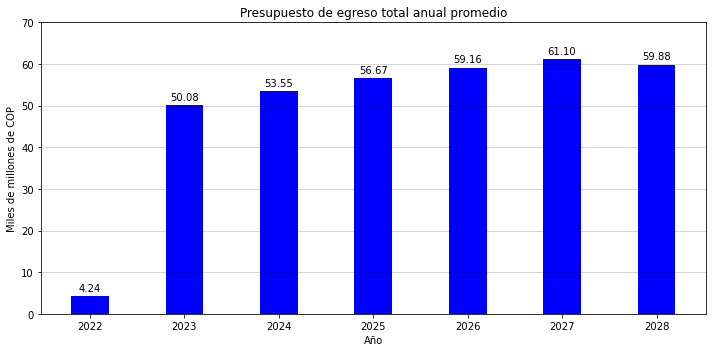

In [74]:
#*******************************************************************************
# 6.1.26. Grafica el egreso anual total, promedio.
#*******************************************************************************
fig, ax = plt.subplots(figsize=(10,5))

anios = egreso_total_a.index.to_period('Y')
egreso_total_promedio = ((egreso_total_a.egreso_total_promedio)/1e3).round(2)


x = np.arange(len(egreso_total_promedio))  # La localización de etiquetas.
width = 0.40  # El ancho de las barras.

rects1 = ax.bar(x, egreso_total_promedio, width, 
    label='Egreso total promedio', color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Presupuesto de egreso total anual promedio')
ax.set_xlabel('Año')
ax.set_ylabel('Miles de millones de COP')
ax.set_xticks(x, anios)
# ax.legend(loc=2)

ax.bar_label(rects1, padding=3, fmt='%0.2f', rotation=0)

fig.tight_layout()

plt.ylim(0, 70)
plt.grid(axis='y', color='k', alpha=0.2)
plt.show()

In [75]:
#*******************************************************************************
# 6.1.27. Calcula el valor estimado del contrato de suministro de energía.
#*******************************************************************************
egreso_total_a.egreso_total_promedio.sum(axis=0)

344672.60401349585

El valor estimado del contrato durante el periodo comprendido entre diciembre de 2022 y diciembre de 2028 es 344.672 millones de pesos.